Objective: Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
"""
Created on 4th Aug 2020
@author: Shilpa Chavan
Algorithm : Decision Tree Algorithm
Dataset : Fraud_check.csv
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
%matplotlib inline

# Importing Dataset

In [2]:
data = pd.read_csv("D:\\Shilpa\\Datascience\\Assignments\\Decision Tree\\Fraud_check.csv")
data.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


# Step: Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
data.shape


(600, 6)

In [6]:
obj = data.select_dtypes('object')
obj.head(10)

,Undergrad,Marital.Status,Urban
0,NO,Single,YES
1,YES,Divorced,YES
2,NO,Married,YES
3,YES,Single,YES
4,NO,Married,NO
5,NO,Divorced,NO
6,NO,Divorced,YES
7,YES,Single,YES
8,NO,Single,YES
9,YES,Divorced,YES


In [7]:
obj.Undergrad.value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [8]:
obj.Urban.value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [9]:
label=LabelEncoder()
data['Undergrad'] = label.fit_transform(data['Undergrad'])
data['Urban'] = label.fit_transform(data['Urban'])
data['Marital.Status'] = label.fit_transform(data['Marital.Status'])
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [10]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [11]:
data.rename(columns={"Marital.Status":"Married"},inplace=True)
data.rename(columns={"Taxable.Income":"Income"},inplace=True)
data.rename(columns={"City.Population":"Population"},inplace=True)
data.rename(columns={"Work.Experience":"Experience"},inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Undergrad   600 non-null    int32
 1   Married     600 non-null    int32
 2   Income      600 non-null    int64
 3   Population  600 non-null    int64
 4   Experience  600 non-null    int64
 5   Urban       600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [13]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Undergrad,600.0,0.520000,0.500017,0.0,0.00,1.0,1.00,1.0
Married,600.0,1.046667,0.821958,0.0,0.00,1.0,2.00,2.0
Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0
Urban,600.0,0.503333,0.500406,0.0,0.00,1.0,1.00,1.0


In [14]:
#Adding new Column in DataFrame as Status where Taxable.Income is less than 30k as Risky (0) else Good (1)
data['Status']=0
for x in range(0,len(data)):
    if data['Income'].iloc[x]<=30000:
        data['Status'].iloc[x] =  0
    else:
        data['Status'].iloc[x] = 1

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
data.head(10)

,Undergrad,Married,Income,Population,Experience,Urban,Status
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1
5,0,0,33329,116382,0,0,1
6,0,0,83357,80890,8,1,1
7,1,2,62774,131253,3,1,1
8,0,2,83519,102481,12,1,1
9,1,0,98152,155482,4,1,1


# Model building & Evaluation function

In [16]:
# Function to split the dataset 
def splitdataset(balance_data): 
  
    # Separating the target variable 
    X = balance_data.values[:, 0:5] 
    Y = balance_data.values[:, 6] 
  
    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 
      
    return X, Y, X_train, X_test, y_train, y_test 
      
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
      
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy
  
#Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 

In [17]:
X =  data.drop('Status',1)
Y =  data.Status
xTrain, xTest, yTrain, yTest =train_test_split(  
data.drop(['Status','Income'],1),data.Status, test_size = 0.3, random_state = 100)
xTrain
yTrain

62     1
352    0
277    1
111    1
512    1
      ..
578    1
53     0
350    1
79     0
520    1
Name: Status, Length: 420, dtype: int64

# Step: Model Building & Evaluation

In [18]:
#help(DecisionTreeClassifier)
#Building decision tree model with default parameters on training dataset
model1 = DecisionTreeClassifier()
#fit the model
model1.fit(xTrain,yTrain)
print("Results Using default parameters:") 

# Prediction using entropy 
yPred = prediction(xTest, model1)

#accuracy
cal_accuracy(yTest, yPred)

Results Using default parameters:
Predicted values:
[1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1]
Confusion Matrix:  [[  5  32]
 [ 34 109]]
Accuracy :  63.33333333333333
Report :                precision    recall  f1-score   support

           0       0.13      0.14      0.13        37
           1       0.77      0.76      0.77       143

    accuracy                           0.63       180
   macro avg       0.45      0.45      0.45       180
weighted avg       0.64      0.63      0.64       180



By Using default parameter model accuracy is 65%.Tuning the decision tree with entropy,gini index, max_depth attributes
for enhancing the performance.

# Step:Optimizing Decision Tree Performance

In [20]:
#Model building on training dataset using criterion = “entropy” for the information gain, max_depth,min_samples_leaf as attributes. .
model = DecisionTreeClassifier(criterion = "entropy", random_state = 100, 
            max_depth = 5, min_samples_leaf = 2)
model.fit(xTrain,yTrain)
print("Results Using criterion,max_depth,min_samples_leaf parameters:") 

# Prediction using entropy 
yPred_entropy = prediction(xTest, model)

#accuracy
cal_accuracy(yTest, yPred_entropy)

Results Using criterion,max_depth,min_samples_leaf parameters:
Predicted values:
[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion Matrix:  [[  2  35]
 [  4 139]]
Accuracy :  78.33333333333333
Report :                precision    recall  f1-score   support

           0       0.33      0.05      0.09        37
           1       0.80      0.97      0.88       143

    accuracy                           0.78       180
   macro avg       0.57      0.51      0.48       180
weighted avg       0.70      0.78      0.72       180



By using criterion as entropy and max_depth= 5, model accuracy has incresed a bit to 78.33%.

In [21]:
#Model building on training dataset using using criterion = “gini” for the Gini index, max_depth,min_samples_leaf as attributes. .
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, 
            max_depth = 4, min_samples_leaf = 2)
clf_gini.fit(xTrain,yTrain)

# Prediction using gini index 
yPred_gini = prediction(xTest, clf_gini)

#accuracy
cal_accuracy(yTest, yPred_gini)

Predicted values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion Matrix:  [[  0  37]
 [  2 141]]
Accuracy :  78.33333333333333
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.79      0.99      0.88       143

    accuracy                           0.78       180
   macro avg       0.40      0.49      0.44       180
weighted avg       0.63      0.78      0.70       180



By using criterion as gini and max_depth= 4, model accuracy has incresed a bit to 78.33%.

# Step: Finding Important features

In [27]:
importances = pd.DataFrame({'feature':xTrain.columns,'importance':np.round(clf_gini.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
2,Population,0.903
3,Experience,0.068
1,Married,0.029
0,Undergrad,0.000
4,Urban,0.000


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.02860
Feature: 2, Score: 0.90318
Feature: 3, Score: 0.06822
Feature: 4, Score: 0.00000


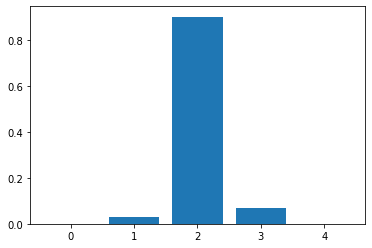

In [26]:
# get importance
importance = clf_gini.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance using bar chart
plt.bar([x for x in range(len(importance))], importance)
plt.show()

From above scores and bar plot, we can see that city population,work experience and martial status are important 
attributes/features for fraud detection.Urban & Undergrad are least important features.
Dropping the least important features and building the model on clf_gini model again.

# Step: Building Decision tree on important features

In [29]:
#Dropping the least important feature 'Education','Urban','US' and rebuilding the model
x_f = data.drop(['Undergrad','Urban','Status','Income'], axis = 1)
y_f = data['Status']
#x_f
#y_f

#Splitting the data into training and test data set
xTrain,xTest, yTrain,yTest= train_test_split(x_f,y_f,test_size=0.2)
finalModel = DecisionTreeClassifier(criterion = "gini", random_state = 100, 
        max_depth = 4, min_samples_leaf = 2)
finalModel.fit(xTrain,yTrain)

#Prediction on test set
finalPred = finalModel.predict(xTest)
finalPred

# Prediction using gini index 
finalPred = prediction(xTest, finalModel)

#accuracy
cal_accuracy(yTest, finalPred)

Predicted values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
Confusion Matrix:  [[ 0 24]
 [ 0 96]]
Accuracy :  80.0
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.80      1.00      0.89        96

    accuracy                           0.80       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.64      0.80      0.71       120



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Visualization

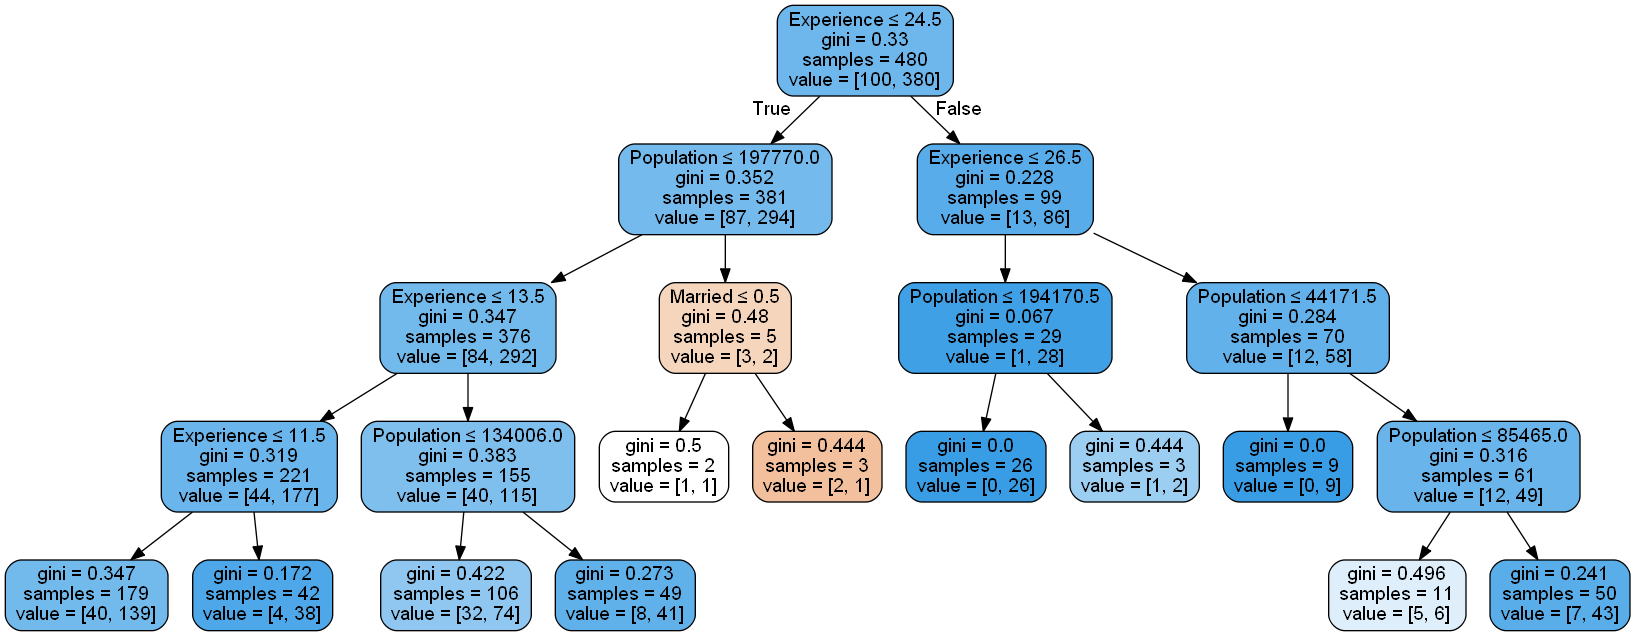

In [33]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydot

dot_data = StringIO()
#Visualizing the decision tree with above optimised parameters
export_graphviz(finalModel, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(xTrain.columns))
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
graph[0].write_png('fraud_detect.png')
Image(graph[0].create_png())

Hence by dropping the least important features and using criterion as gini, max_depth = 4 
Final model accuracy is increased to 80%.Work experience and city population are important attributes/features for fraud detection.